In [1]:
import numpy as np

In [3]:
X = np.array([
    [2.5,2.4],
    [0.5,0.7],
    [2.2,2.9],
    [1.9,2.2],
    [3.1,3.0],
    [2.3,2.7],
    [2.0,1.6],
    [1.0,1.1],
    [1.5,1.6],
    [1.1,0.9]
], dtype=float)

In [11]:
mean = X.mean(axis=0)
Xc = X - mean

In [13]:
cov = np.cov(Xc, rowvar=False, bias=True)

In [15]:
print("Mean:", mean)
print("Covariance matrix:\\n", cov)

Mean: [1.81 1.91]
Covariance matrix:\n [[0.5549 0.5539]
 [0.5539 0.6449]]


In [17]:
eigvals, eigvecs = np.linalg.eigh(cov)  # ascending order
# reverse to descending
eigvals = eigvals[::-1]
eigvecs = eigvecs[:, ::-1]

print("Eigenvalues:", eigvals)
print("Eigenvectors (columns = principal components):\\n", eigvecs)

Eigenvalues: [1.15562494 0.04417506]
Eigenvectors (columns = principal components):\n [[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]


In [19]:
Z = Xc @ eigvecs  # n x d


In [21]:
k = 1
X_recon_k = Z[:, :k] @ eigvecs[:, :k].T + mean

In [23]:
recon_error = np.sum((X - X_recon_k)**2)
print("Total reconstruction error using k=1:", recon_error)

Total reconstruction error using k=1: 0.4417505904449457


In [25]:
explained_variance = eigvals / eigvals.sum()
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.96318131 0.03681869]


Explained variance ratio (first 2): [0.72962445 0.22850762]
Singular values: [20.92306556 11.7091661 ]


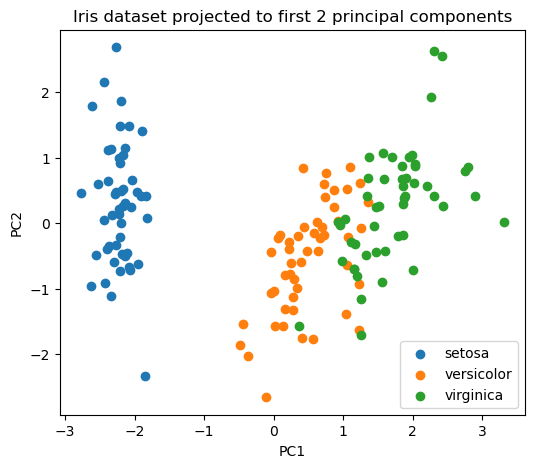

In [27]:
# PCA with sklearn on Iris dataset
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load Iris
iris = datasets.load_iris()
X = iris.data  # 150 x 4
y = iris.target
target_names = iris.target_names

# Standardize (important when features have different units)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)  # reduce to 2D for visualization
Z = pca.fit_transform(Xs)

print("Explained variance ratio (first 2):", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)

# Scatter plot
plt.figure(figsize=(6,5))
for target in np.unique(y):
    mask = (y == target)
    plt.scatter(Z[mask,0], Z[mask,1], label=target_names[target])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("Iris dataset projected to first 2 principal components")
plt.show()
